#MNIST Classification on Rotated Images

Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
%matplotlib inline

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.utils import to_categorical, normalize
from keras import Sequential

In [ ]:
import tensorflow as tf

(xtrain,ytrain),(xtest,ytest)=tf.keras.datasets.mnist.load_data()

In [ ]:
print(xtrain.shape)
print(ytrain.shape)

(60000, 28, 28)
(60000,)


In [ ]:
train=np.reshape(xtrain,(60000,28,28,1))
ytrain=to_categorical(ytrain)

In [ ]:
train=train/255


In [ ]:
from sklearn.model_selection import train_test_split

val_split = 0.2
X_train, X_val, y_train, y_val = train_test_split(train, ytrain, test_size=val_split, stratify=ytrain)

X = np.concatenate((X_train, X_val))
y = np.concatenate((y_train, y_val))


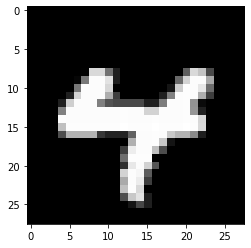

In [ ]:
plt.subplot(111)
plt.imshow(X[1001].squeeze(), cmap="gray")

In [ ]:
print(X.shape)
print(y.shape)

(60000, 28, 28, 1)
(60000, 10)


Creating Keras Model CNN

In [ ]:

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, strides=(1,1), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, 3, activation='relu'))
model.add(Dropout(0.15))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 128)        

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(rotation_range=360)

datagen.fit(X)

newhist=model.fit(datagen.flow(X, y, batch_size=32,shuffle=True,
         subset=None),
         validation_data=datagen.flow(X, y,shuffle=True,
         batch_size=32, subset=None),
         steps_per_epoch=len(X) / 32, epochs=10,verbose=1)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5277 - accuracy: 0.8253 - val_loss: 0.2193 - val_accuracy: 0.9309
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2128 - accuracy: 0.9356 - val_loss: 0.1793 - val_accuracy: 0.9438
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1748 - accuracy: 0.9472 - val_loss: 0.1498 - val_accuracy: 0.9536
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1585 - accuracy: 0.9529 - val_loss: 0.1248 - val_accuracy: 0.9618
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1451 - accuracy: 0.9561 - val_loss: 0.1220 - val_accuracy: 0.9635
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1346 - accuracy: 0.9596 - val_loss: 0.1152 - val_accuracy: 0.9652
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1275 - accuracy: 0.9620 - val_loss: 0.1177 -

In [ ]:
# history = model.fit(train_reshaped, y, batch_size=64, epochs=5, verbose=1, validation_split=0.2)

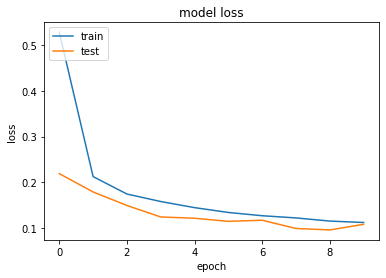

In [ ]:
plt.plot(newhist.history['loss'])
plt.plot(newhist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
data=X[2004]

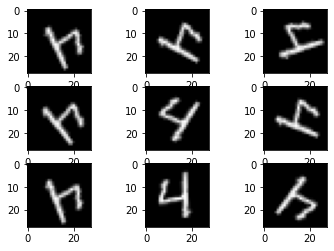

In [ ]:
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(rotation_range=360)

it = datagen.flow(samples, batch_size=1)
images=[]
for i in range(9):
	
	pyplot.subplot(330 + 1 + i)
	
	batch = it.next()
	
	image = batch[0]
	images.append(image)

	pyplot.imshow(image.squeeze(),cmap="gray")

pyplot.show()

In [ ]:
images=np.array(images)

In [ ]:
results = model.predict(images)
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [ ]:
results

0    4
1    4
2    4
3    4
4    4
5    4
6    4
7    4
8    4
Name: Label, dtype: int64

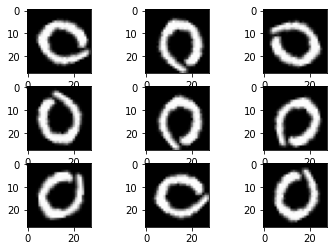

In [ ]:
data1=X[98]
samples = expand_dims(data1, 0)
datagen = ImageDataGenerator(rotation_range=360)

it = datagen.flow(samples, batch_size=1)
images=[]
for i in range(9):
	
	pyplot.subplot(330 + 1 + i)
	
	batch = it.next()
	
	image = batch[0]
	images.append(image)

	pyplot.imshow(image.squeeze(),cmap="gray")

pyplot.show()

In [ ]:
images=np.array(images)

results = model.predict(images)
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")
results

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
Name: Label, dtype: int64